In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

nobel = pd.read_csv('archive.csv')

wanted_output = nobel.filter(['Full Name', 'Sex'])
print(wanted_output)

In [ ]:
nobel = nobel.assign(age_at_receival=lambda x: pd.to_datetime(x['Year'], format='%Y').dt.year - pd.to_datetime(x['Birth Date'], errors='coerce').dt.year)
print(nobel['age_at_receival'])

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
964    71.0
965    65.0
966    82.0
967    65.0
968    73.0
Name: age_at_receival, Length: 969, dtype: float64


Text(0.5, 0, 'amount of prizes')

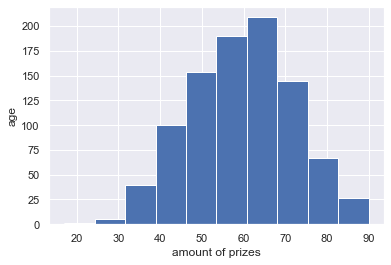

In [ ]:
plt.hist(nobel['age_at_receival'])
plt.ylabel('age')
plt.xlabel('amount of prizes')

In [ ]:
oldest = nobel['age_at_receival'].max()

print(oldest)

90.0


In [ ]:
youngest = nobel['age_at_receival'].min()

print(youngest)

17.0


(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

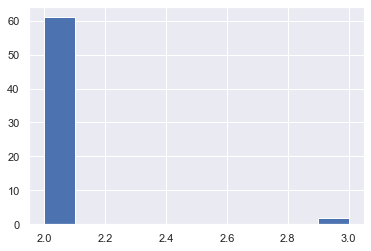

In [ ]:
df = pd.DataFrame(nobel)
duplicates = df[df.duplicated(['Full Name'], keep=False)]
table = duplicates.pivot_table(index=['Full Name'], aggfunc='size')

plt.hist(table)

mean age:  59.48400852878465
median age:  60.0
standard deviation of age:  12.37722027678576
variance of age:  153.19558178007657
percentile 25:  50.0
percentile 50:  60.0
percentile 75:  69.0
percentile 99:  85.63


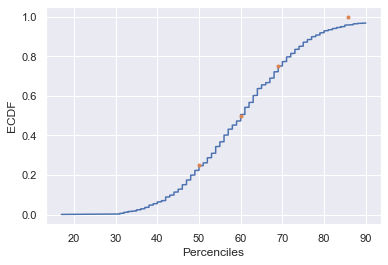

In [ ]:
mean_age = nobel.age_at_receival.mean()
print('mean age: ', mean_age)

median_age = nobel.age_at_receival.median()
print('median age: ', median_age)

standard_deviation = nobel.age_at_receival.std()
print('standard deviation of age: ', standard_deviation)

variance = nobel.age_at_receival.var()
print('variance of age: ', variance)

percentiles_25 = nobel.age_at_receival.quantile(0.25)
percentiles_50 = nobel.age_at_receival.quantile(0.5)
percentiles_75 = nobel.age_at_receival.quantile(0.75)
percentiles_99 = nobel.age_at_receival.quantile(0.99)

print('percentile 25: ', percentiles_25)
print('percentile 50: ', percentiles_50)
print('percentile 75: ', percentiles_75)
print('percentile 99: ', percentiles_99)

percentiles = [percentiles_25, percentiles_50, percentiles_75, percentiles_99]

def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y


x,y = ecdf(nobel.age_at_receival)
x_perc, y_perc = ecdf(percentiles)

plt.plot(x, y)
plt.xlabel('Age')
plt.ylabel('ECDF')

plt.plot(x_perc, y_perc, '.')
plt.xlabel('Percenciles')
plt.ylabel('ECDF')

plt.show()


In [ ]:
from scipy.stats import poisson
prob_for_younger_than_18 = poisson.cdf(k=17, mu=mean_age)

import _thread

print('probability for winner aged 18 and under: ', prob_for_younger_than_18)

def calc_rand_numbers(name, amount):
  amount_of_hits = 0
  
  for i in range(amount):
    rand_num = np.random.rand()
    print(rand_num)
    if rand_num <= prob_for_younger_than_18:
      amount_of_hits += 1
  
  print('%s: %s' % (name, amount_of_hits))



NameError: name 'mean_age' is not defined